# PPGCOMP - FURG | 23148P - Data Visualization and Exploratory Data Analysis | 02/2024 
This notebook contains the solution for Task 06 of the course 23148P - Data Visualization and Exploratory Data Analysis - 02/2024 of the Graduate Program in Computing at FURG (PPGCOMP-FURG).

**Professor:** Dr. Adriano Velasque Werhli.

**Student:** Vitor Avelaneda.

* **Contact:** avelaneda.vitor@gmail.com

The repository with the notebooks can be accessed [here!](https://github.com/vitoravelaneda/23148P-Data_Visualization_and_Exploratory_Data_Analysis-PPGCOMP-FURG)

## Solutions:

**Verify the installation of necessary packages.**

In [1]:
if (!requireNamespace("ggplot2", quietly = TRUE)) install.packages("ggplot2")
if (!requireNamespace("tidyverse", quietly = TRUE)) install.packages("tidyverse")
if (!requireNamespace("RColorBrewer", quietly = TRUE)) install.packages("RColorBrewer")
if (!requireNamespace("showtext", quietly = TRUE)) install.packages("showtext")
if (!requireNamespace("scales", quietly = TRUE)) install.packages("scales")

**Load necessary packages.**

In [2]:
library(ggplot2)
library(tidyverse)
library(RColorBrewer)
library(showtext)
library(scales)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Carregando pacotes exigidos: sysfonts

Carregando pacotes exigidos: showtextdb


Anexando pacote: ‘scales’


O seguinte objeto é mascarado por ‘package:purrr’:

    discard


O seguinte objeto é mascarado por ‘package:readr’:

    col_factor




### Tidy Data:

**Reading the Data:**

In [3]:
my.data <- data.frame(read.csv("../task-05/data_mortalidade_Regiao.csv"))

head(my.data)

,Região,Menor.1.ano,X1.a.4.anos,X5.a.9.anos,X10.a.14.anos,X15.a.19.anos,X20.a.29.anos,X30.a.39.anos,X40.a.49.anos,X50.a.59.anos,X60.a.69.anos,X70.a.79.anos,X80.anos.e.mais,Idade.ignorada,Total
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Norte,4587,843,428,581,2006,6571,7851,10968,15768,21996,22996,25750,265,120610
2,Nordeste,10036,1442,856,1250,5767,18603,23930,36101,54654,73504,88836,127921,553,443453
3,Sudeste,11107,1671,917,1230,4767,19943,33991,62972,111710,170579,184709,239754,1276,844626
4,Sul,3436,577,345,426,1753,7199,11681,20897,38562,58271,66363,80627,177,290314
5,Centro-Oeste,2690,488,220,312,1291,4520,7749,13037,19996,25781,27160,30296,106,133646
6,Total,31856,5021,2766,3799,15584,56836,85202,143975,240690,350131,390064,504348,2377,1832649


**Remove `Total` line:**

In [4]:
linha<-c(6) 
df <- my.data[-linha,]
head(df)

,Região,Menor.1.ano,X1.a.4.anos,X5.a.9.anos,X10.a.14.anos,X15.a.19.anos,X20.a.29.anos,X30.a.39.anos,X40.a.49.anos,X50.a.59.anos,X60.a.69.anos,X70.a.79.anos,X80.anos.e.mais,Idade.ignorada,Total
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Norte,4587,843,428,581,2006,6571,7851,10968,15768,21996,22996,25750,265,120610
2,Nordeste,10036,1442,856,1250,5767,18603,23930,36101,54654,73504,88836,127921,553,443453
3,Sudeste,11107,1671,917,1230,4767,19943,33991,62972,111710,170579,184709,239754,1276,844626
4,Sul,3436,577,345,426,1753,7199,11681,20897,38562,58271,66363,80627,177,290314
5,Centro-Oeste,2690,488,220,312,1291,4520,7749,13037,19996,25781,27160,30296,106,133646


**Rename age group columns by range:**

In [5]:
df <- rename(df, '<1' = 'Menor.1.ano')
df <- rename(df, '1~4' = 'X1.a.4.anos')
df <- rename(df, '5~9' = 'X5.a.9.anos')
df <- rename(df, '10~14' = 'X10.a.14.anos')
df <- rename(df, '15~19' = 'X15.a.19.anos')
df <- rename(df, '20~29' = 'X20.a.29.anos')
df <- rename(df, '30~39' = 'X30.a.39.anos')
df <- rename(df, '40~49' = 'X40.a.49.anos')
df <- rename(df, '50~59' = 'X50.a.59.anos')
df <- rename(df, '60~69' = 'X60.a.69.anos')
df <- rename(df, '70~79' = 'X70.a.79.anos')
df <- rename(df, '>80' = 'X80.anos.e.mais')
df <- rename(df, 'Ignorada' = 'Idade.ignorada')

head(df)

,Região,<1,1~4,5~9,10~14,15~19,20~29,30~39,40~49,50~59,60~69,70~79,>80,Ignorada,Total
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Norte,4587,843,428,581,2006,6571,7851,10968,15768,21996,22996,25750,265,120610
2,Nordeste,10036,1442,856,1250,5767,18603,23930,36101,54654,73504,88836,127921,553,443453
3,Sudeste,11107,1671,917,1230,4767,19943,33991,62972,111710,170579,184709,239754,1276,844626
4,Sul,3436,577,345,426,1753,7199,11681,20897,38562,58271,66363,80627,177,290314
5,Centro-Oeste,2690,488,220,312,1291,4520,7749,13037,19996,25781,27160,30296,106,133646


**Remove `Total` column:**

In [6]:
df$Total <- NULL

head(df)

,Região,<1,1~4,5~9,10~14,15~19,20~29,30~39,40~49,50~59,60~69,70~79,>80,Ignorada
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Norte,4587,843,428,581,2006,6571,7851,10968,15768,21996,22996,25750,265
2,Nordeste,10036,1442,856,1250,5767,18603,23930,36101,54654,73504,88836,127921,553
3,Sudeste,11107,1671,917,1230,4767,19943,33991,62972,111710,170579,184709,239754,1276
4,Sul,3436,577,345,426,1753,7199,11681,20897,38562,58271,66363,80627,177
5,Centro-Oeste,2690,488,220,312,1291,4520,7749,13037,19996,25781,27160,30296,106


**Transforming the data frame `df` from `wide` to `long` format:**

In [7]:
df_long <- df %>%
  pivot_longer(cols = -Região, names_to = "FaixaEtaria", values_to = "TotalMortes")

head(df_long)

Região,FaixaEtaria,TotalMortes
<chr>,<chr>,<int>
Norte,<1,4587
Norte,1~4,843
Norte,5~9,428
Norte,10~14,581
Norte,15~19,2006
Norte,20~29,6571


**Reordering by age group:**

In [8]:
df_long$FaixaEtaria <- factor(df_long$FaixaEtaria, levels = c(
    "<1", "1~4", "5~9", "10~14", "15~19", "20~29", "30~39", "40~49", 
    "50~59", "60~69", "70~79", ">80", "Ignorada"
    ))

head(df_long)

Região,FaixaEtaria,TotalMortes
<chr>,<fct>,<int>
Norte,<1,4587
Norte,1~4,843
Norte,5~9,428
Norte,10~14,581
Norte,15~19,2006
Norte,20~29,6571


### Exercise 1:

Warning message in RColorBrewer::brewer.pal(n, pal):
“n too large, allowed maximum for palette Paired is 12
Returning the palette you asked for with that many colors
”


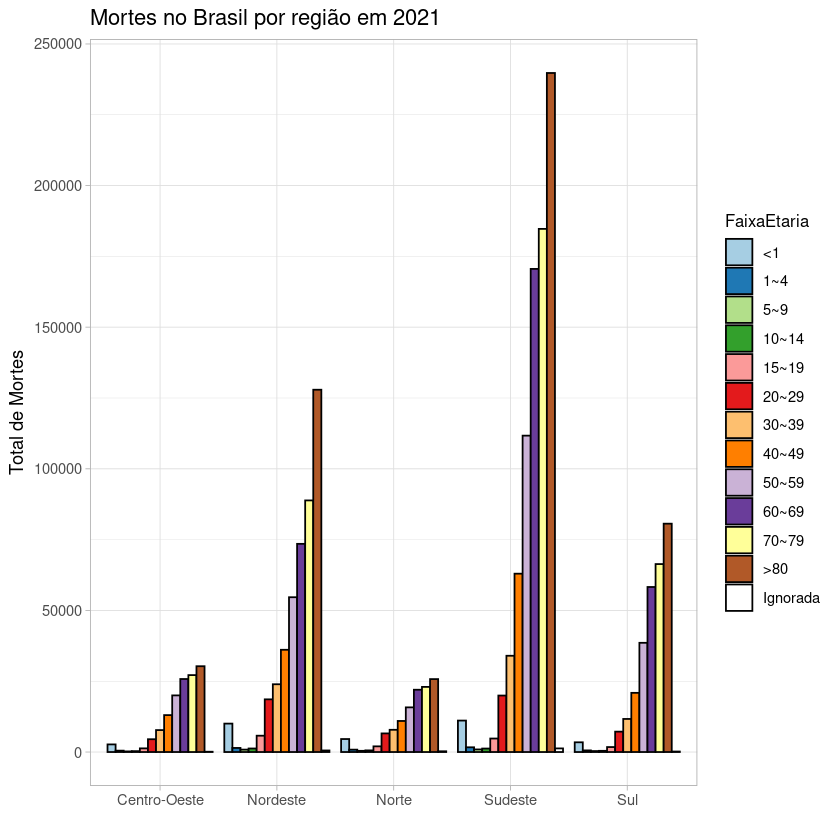

In [9]:
ggplot(df_long, aes(x = Região, y = TotalMortes, fill = FaixaEtaria)) +
  geom_bar(stat = "identity", position = "dodge",color="black") +
  labs(title = "Mortes no Brasil por região em 2021", x = "", y = "Total de Mortes") +
  scale_fill_brewer(palette = "Paired") +
  theme_light() +
  theme(legend.position = "right", legend.title = element_text(size = 10))

### Exercise 2:

Warning message in RColorBrewer::brewer.pal(n, pal):
“n too large, allowed maximum for palette Set3 is 12
Returning the palette you asked for with that many colors
”


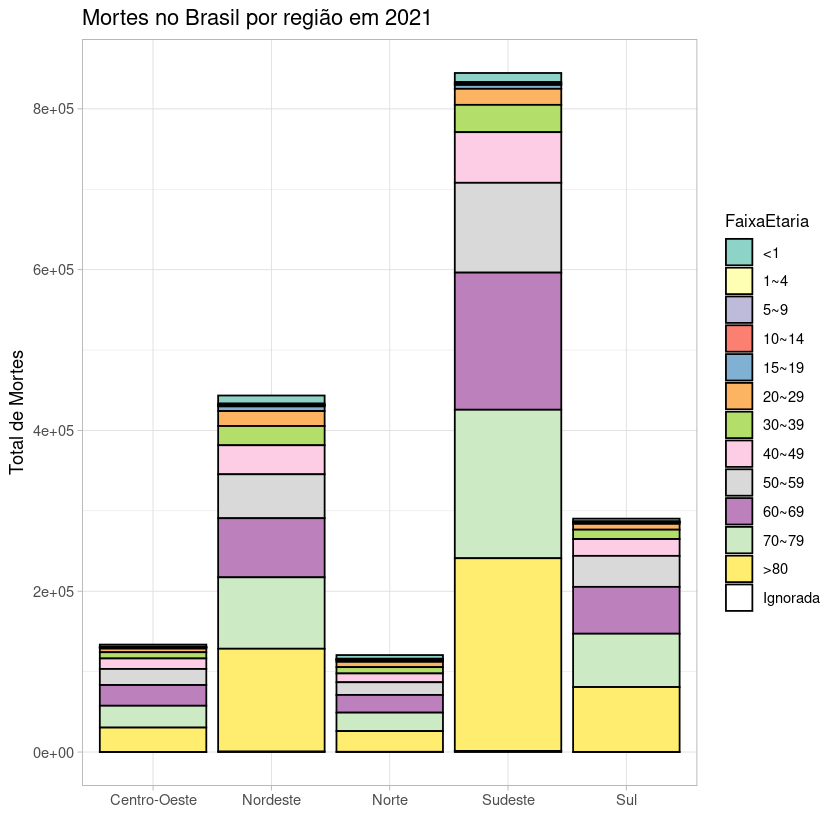

In [10]:
ggplot(df_long, aes(x = Região, y = TotalMortes, fill = FaixaEtaria)) +
  geom_bar(stat = "identity", position = "stack",color="black") +
  labs(title = "Mortes no Brasil por região em 2021", x = "", y = "Total de Mortes") +
  scale_fill_brewer(palette = "Set3") +
  theme_light() +
  theme(legend.position = "right", legend.title = element_text(size = 10))

### Exercise 3:

Warning message in RColorBrewer::brewer.pal(n, pal):
“n too large, allowed maximum for palette Paired is 12
Returning the palette you asked for with that many colors
”


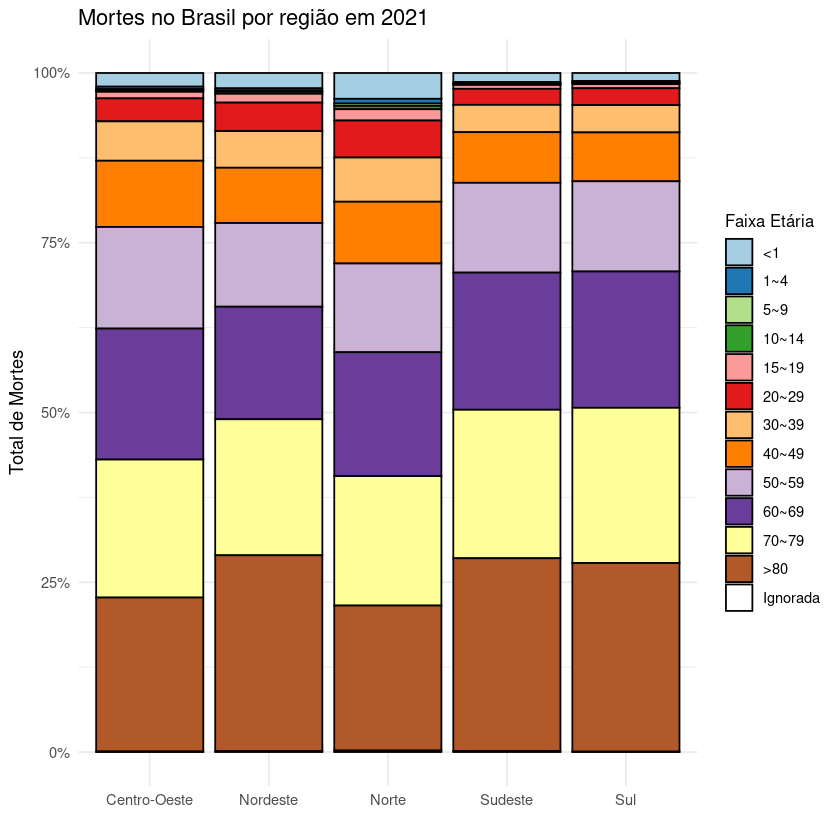

In [11]:
ggplot(df_long, aes(x = Região, y = TotalMortes, fill = FaixaEtaria)) +
  geom_bar(stat = "identity", position = "fill", color="black") +
  labs(title = "Mortes no Brasil por região em 2021", 
       x = "", y = "Total de Mortes") +
  scale_y_continuous(labels = scales::percent) +
  scale_fill_brewer(palette = "Paired", name = "Faixa Etária") +
  theme_minimal() +
  theme(legend.position = "right", legend.title = element_text(size = 10))

### Exercise 4:

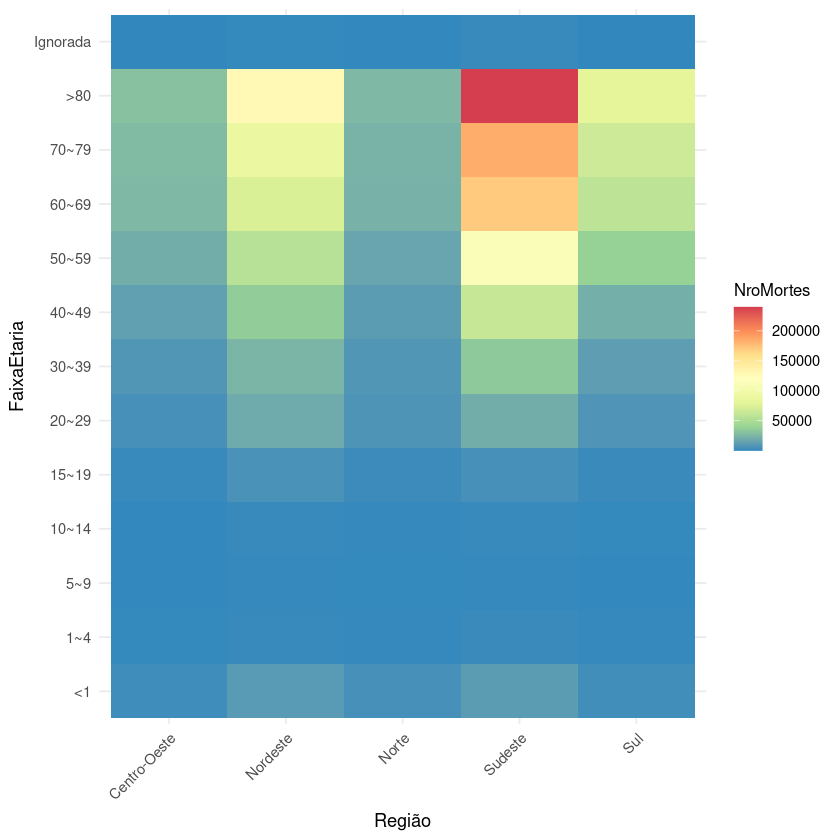

In [12]:
ggplot(df_long, aes(x = Região, y = FaixaEtaria, fill = TotalMortes)) +
  geom_tile() +
  labs(x = "Região", y = "FaixaEtaria") +
  scale_fill_distiller(palette = "Spectral", name = "NroMortes") +
  theme_minimal() +
  theme(legend.position = "right", legend.title = element_text(size = 10),
        axis.text.x = element_text(angle = 45, hjust = 1))

### Exercise 5:

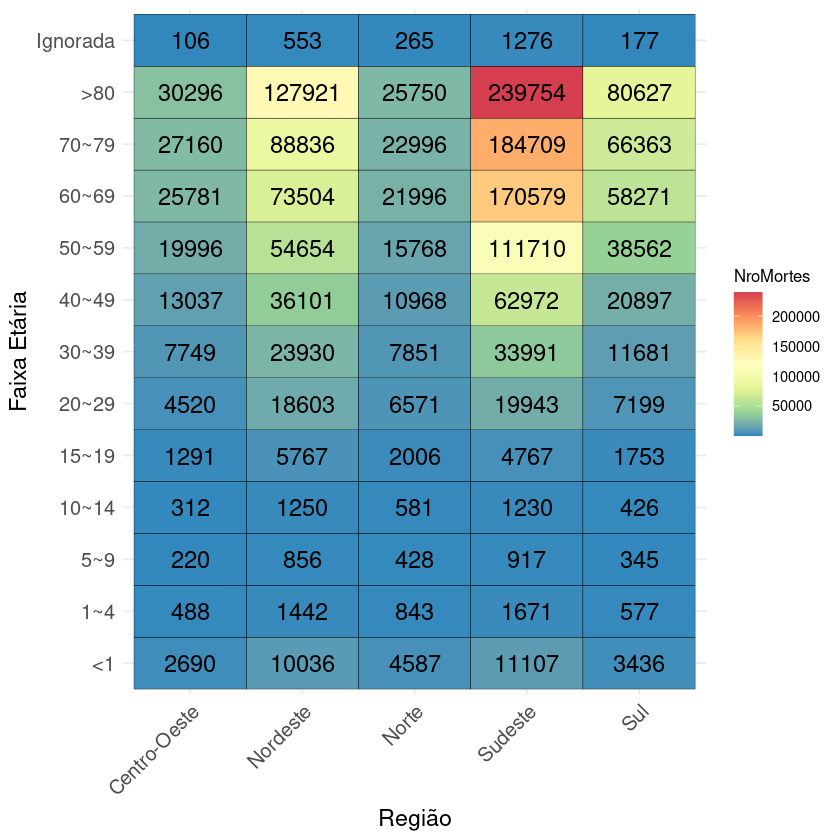

In [13]:
ggplot(df_long, aes(x = Região, y = FaixaEtaria, fill = TotalMortes)) +
  geom_tile(color = "black") +
  geom_text(aes(label = TotalMortes), color = "black", size = 5) +
  labs(x = "Região", y = "Faixa Etária") +
  scale_fill_distiller(palette = "Spectral", name = "NroMortes") +
  theme_minimal() +
  theme(
    legend.position = "right", 
    legend.title = element_text(size = 10),
    axis.text.x = element_text(size = 12, angle = 45, hjust = 1), 
    axis.text.y = element_text(size = 12),  
    axis.title.x = element_text(size = 14),
    axis.title.y = element_text(size = 14)
  )